In [ ]:
!pip install gdown
!pip install xgboost
!gdown https://drive.google.com/uc?id=1Nvm9fCI3C4IoAsTQOoKP97YwVNgwhrKA
!gdown https://drive.google.com/uc?id=1nYyaHYSK3sK81vNR_lJXLSR07WIv-anG
!gdown https://drive.google.com/uc?id=1UHoH31_pKBawersUL3x2EHAqVuRmXGTm
!unzip -o X_train.zip
!unzip -o X_test.zip

Downloading...
From: https://drive.google.com/uc?id=1Nvm9fCI3C4IoAsTQOoKP97YwVNgwhrKA
To: /home/michal/Dokumenty/4Year/SML/X_test.zip
100%|██████████████████████████████████████| 1.52M/1.52M [00:00<00:00, 3.08MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nYyaHYSK3sK81vNR_lJXLSR07WIv-anG
To: /home/michal/Dokumenty/4Year/SML/X_train.zip
100%|██████████████████████████████████████| 8.60M/8.60M [00:00<00:00, 28.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UHoH31_pKBawersUL3x2EHAqVuRmXGTm
To: /home/michal/Dokumenty/4Year/SML/Y_train.csv
100%|██████████████████████████████████████| 67.7k/67.7k [00:00<00:00, 2.78MB/s]
Archive:  X_train.zip
  inflating: X_train_sml.csv         
Archive:  X_test.zip
  inflating: X_test_sml.csv          


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBRegressor, XGBRFRegressor

In [ ]:
x_test = pd.read_csv('X_test_sml.csv', sep=',')
x_train = pd.read_csv('X_train_sml.csv', sep=',')
y_train = pd.read_csv('Y_train.csv', sep=',')

display(x_test.head())
display(x_train.head())
display(y_train.head())

,A2M-AS1,AAAS,AAGAB,AAMDC,AAMP,AASDHPPT,AATF,ABALON,ABCA5,ABCA7,...,ZSWIM3,ZSWIM6,ZSWIM8,ZUP1,ZWILCH,ZWINT,ZXDB,ZXDC,ZYX,ZZEF1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.812087,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.812087,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.495315,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.495315
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.731568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.891175,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


,A2M-AS1,AAAS,AAGAB,AAMDC,AAMP,AASDHPPT,AATF,ABALON,ABCA5,ABCA7,...,ZSWIM3,ZSWIM6,ZSWIM8,ZUP1,ZWILCH,ZWINT,ZXDB,ZXDC,ZYX,ZZEF1
0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.935141,0.0,0.000000,0.000000
1,0.0,0.569091,0.0,0.92953,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.906508
3,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.663242,0.000000
4,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.874004,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


,CD36
0,0.257559
1,2.906230
2,0.196396
3,0.143823
4,1.132499


# Task 1
### 1.a
All columns contain numeric data and there are no NaN values.

In [ ]:
print(f'x_test - number of rows: {x_test.shape[0]}, number of variables: {x_test.shape[1]}')
print(f'x_train - number of rows: {x_train.shape[0]}, number of variables: {x_train.shape[1]}')
print(f'x_train - number of rows: {y_train.shape[0]}, number of variables: {y_train.shape[1]}')

x_test - number of rows: 761, number of variables: 6938
x_train - number of rows: 4302, number of variables: 6938
x_train - number of rows: 4302, number of variables: 1


In [ ]:
print(f"x_test - number of float columns: {(x_test.dtypes == 'float64').array.sum()}")
print(f"x_train - number of float columns: {(x_train.dtypes == 'float64').array.sum()}")
print(f"y_train - number of float columns: {(y_train.dtypes == 'float64').array.sum()}")

x_test - number of float columns: 6938
x_train - number of float columns: 6938
y_train - number of float columns: 1


In [ ]:
print(f'Number of NANs in x_test: {x_test.isna().sum().array.sum()}')
print(f'Number of NANs in x_train: {x_train.isna().sum().array.sum()}')
print(f'Number of NANs in y_train: {y_train.isna().sum().array.sum()}')

Number of NANs in x_test: 0
Number of NANs in x_train: 0
Number of NANs in y_train: 0


### 1.b

In [ ]:
display(y_train.describe())

,CD36
count,4302.000000
mean,1.083916
std,1.460003
min,0.000000
25%,0.080222
50%,0.235725
75%,2.627521
max,5.104848


In [ ]:
px.histogram(y_train)

Most of the values of the response variable are smaller than 1.

### 1.c

In [ ]:
correlations_pearson = x_train.corrwith(y_train['CD36'], method='pearson')
correlations_spearman = x_train.corrwith(y_train['CD36'], method='spearman')
correlations_kendall = x_train.corrwith(y_train['CD36'], method='kendall')

px.violin(pd.DataFrame({'pearson': correlations_pearson, 'spearman': correlations_spearman, 'kendall': correlations_kendall}))

We can see that vast majority of explanatory variables have very weak correlation (-0.2 < corr < 0.2) with response variable. This is especially visible at plots for Spearman and Kendall correlations.

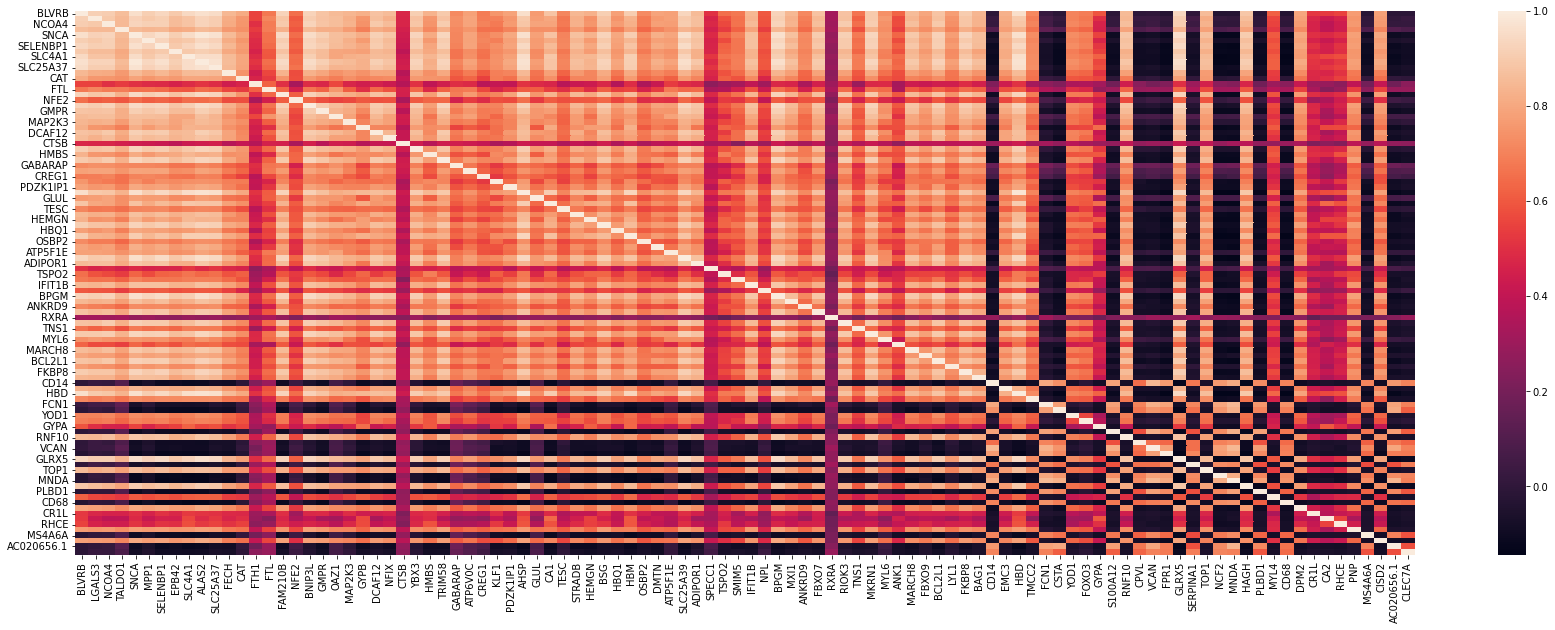

In [ ]:
# Pearson assumes normality of data and linear relationship - those assumptions may not be met. 
# It is also sensitive to the outliers.
# So let's use Spearman correlation instead. 
sorted_corrs = correlations_spearman.sort_values(ascending=False)
most_correlated = sorted_corrs[:100].index

plt.figure(figsize=(30, 10))
sns.heatmap(x_train[most_correlated].corr())
plt.show()

We can see especially strong correlation between variables in the top left corner. It is also visible that some variables (e.g. FCN1, CSTA, CPVL, VCAN) which are heavily correlated to response variable are very weakly completely correlated with other explanatory variables. 

This means that we may be able to reduce dimensionality of the data by removing some variables correlated to other explanatory variables. But in the same time we see that there are also some variables (e.g. FCN1, CSTA, CPVL, VCAN) which cannot be removed as they do not have strong correlation with other explanatory variables.

# Task 2

### 2.a

ElasticNet combines both  L1 and L2 regularizations. 
Both L1 and L2 penalize too big weights of the model by adding to RSS the penalty term
$\lambda \sum_i | \beta_i |$ or $\lambda \sum_i \beta_i^2$.
ElasticNet uses both of them e.g. it adds 
$$\lambda_1 \sum_i \lVert \beta_i \rVert_1 + \lambda_1 \sum_i \lVert \beta_i \rVert_2$$

So the function optimized by the ElasticNet is 
$$RSS + \lambda_1 \sum_i | \beta_i | + \lambda_2 \sum_i \beta_i^2$$
where we try to learn values of parameters $\beta_i$ ($i = 1, ..., N + 1$, $N$ is a number of explanatory variables). 
The function depends on hyperparameters $\lambda_1$ and $\lambda_2$. 

For $\lambda_1 = 1$ and $\lambda_2 = 0$ we get a lasso regression (regularization L1) and  
for $\lambda_1 = 0$ and $\lambda_2 = 1$ we get ridge regression (regularization L2).

However, ElasticNet model implemented in the `scikit-learn` package that we use in this task, solves this problem using slightly different formula:
$$\min_{\beta_i} { \frac{1}{2} MSE + \alpha \rho \sum_i{|\beta_i|} + \frac{\alpha(1-\rho)}{2} \sum_i{\beta_i^2}}$$

Here we also try to learn values of $\beta_i$. This formula is equivalent to the first one but uses different hyperparameters $\alpha$ and $\rho$ (l1_ratio in the code). 

For $\rho = 1$ we get a lasso regression (regularization L1) and  
for $\rho = 0$ we get ridge regression (regularization L2).

### 2.b

In [ ]:
def run_cv(model, parameters, k_folds):
    grid_search = GridSearchCV(
        model, 
        param_grid=parameters, 
        scoring='neg_mean_squared_error', 
        cv=k_folds, 
        return_train_score=True
    )
    _ = grid_search.fit(x_train, y_train.iloc[:, 0])
    return grid_search


def show_cv_results(grid_search, num_results=10, show_best=True):
    if show_best:
        for param_name, param_value in grid_search.best_params_.items():
            print(f"Best {param_name}: {param_value}")

    results = pd.DataFrame(grid_search.cv_results_)
    results = results[
        ['mean_train_score', 'mean_test_score', 'rank_test_score'] + 
        [col for col in results.columns if 'param_' in col]
    ]
    # Original score used in cross validation was a negated MSE. Convert to RMSE.
    results[['mean_train_score', 'mean_test_score']] = np.sqrt(-results[['mean_train_score', 'mean_test_score']])
    results = results.sort_values(by='rank_test_score')  # Order by test scores.
    results = results.rename(
        {col: col.replace('param_', '') for col in results.columns if 'param_' in col}, 
        axis='columns'
    )
    display(results.iloc[:num_results, :])  # Show only best results.


# Number of subsets in cross validation
# Justification: higher number of folds in cross validation leads to longer training times.
# Five seems to be optimal value that allows for proper validation of the model and 
# in the same time it doesn't unnecessarily increase training time.
k_folds = 5

In [ ]:
# Parameters
l1_ratio = np.linspace(0, 1, 5)
alpha = 4 ** np.linspace(-4, 2, 5)

parameters = {
    'l1_ratio': list(l1_ratio),
    'alpha': list(alpha)
}

# Ignore annoying warnings from elastic net. They basically mean that model overfits on training data. 
# Of course it does, that's why we test different parameters.
warnings.filterwarnings('ignore')

elastic_net = ElasticNet()
grid_search_elastic_net = run_cv(elastic_net, parameters, k_folds)

warnings.resetwarnings()  # Restore default warning settings

### 2.c

In [ ]:
show_cv_results(grid_search_elastic_net)

Best alpha: 0.25
Best l1_ratio: 0.0


,mean_train_score,mean_test_score,rank_test_score,alpha,l1_ratio
10,0.241330,0.386141,1,0.25,0.0
4,0.310394,0.391509,2,0.003906,1.0
3,0.286984,0.391884,3,0.003906,0.75
2,0.250446,0.395894,4,0.003906,0.5
6,0.358794,0.398336,5,0.03125,0.25
1,0.183939,0.418801,6,0.003906,0.25
7,0.398043,0.419339,7,0.03125,0.5
15,0.380722,0.422290,8,2.0,0.0
5,0.108750,0.432368,9,0.03125,0.0
8,0.423138,0.438009,10,0.03125,0.75


# Task 3

### 3.a

In [ ]:
# Parameters
n_estimators = [4, 16]
min_samples_split = [4, 16]
min_samples_leaf = [1, 4, 16]

parameters = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

random_forest = RandomForestRegressor()
grid_search_random_forest = run_cv(random_forest, parameters, k_folds)
show_cv_results(grid_search_random_forest)

Best min_samples_leaf: 4
Best min_samples_split: 4
Best n_estimators: 16


,mean_train_score,mean_test_score,rank_test_score,min_samples_leaf,min_samples_split,n_estimators
5,0.203798,0.378702,1,4,4,16
1,0.161722,0.380921,2,1,4,16
7,0.230203,0.385410,3,4,16,16
11,0.299990,0.388237,4,16,16,16
3,0.202106,0.390061,5,1,16,16
9,0.303963,0.397236,6,16,4,16
8,0.321931,0.412198,7,16,4,4
10,0.325518,0.415642,8,16,16,4
0,0.208842,0.421000,9,1,4,4
2,0.249392,0.422814,10,1,16,4


In [ ]:
big_random_forest = RandomForestRegressor()
grid_search_big_random_forest = run_cv(big_random_forest, {'n_estimators': [100]}, k_folds)
show_cv_results(grid_search_big_random_forest)

Best n_estimators: 100


,mean_train_score,mean_test_score,rank_test_score,n_estimators
0,0.138175,0.366871,1,100


### 3.b

In [ ]:
def rmse(ys, preds):
    return np.sqrt(np.mean((ys - preds) ** 2))

print('Reference model (response variable mean)')
print(f'RMSE={rmse(y_train.iloc[:, 0], np.mean(y_train.iloc[:, 0]))}')
print('ElasticNet')
show_cv_results(grid_search_elastic_net, num_results=5, show_best=False)
print('Random Forest')
show_cv_results(grid_search_random_forest, num_results=5, show_best=False)

Reference model (response variable mean)
RMSE=1.459833483254431
ElasticNet


,mean_train_score,mean_test_score,rank_test_score,alpha,l1_ratio
10,0.241330,0.386141,1,0.25,0.0
4,0.310394,0.391509,2,0.003906,1.0
3,0.286984,0.391884,3,0.003906,0.75
2,0.250446,0.395894,4,0.003906,0.5
6,0.358794,0.398336,5,0.03125,0.25


Random Forest


,mean_train_score,mean_test_score,rank_test_score,min_samples_leaf,min_samples_split,n_estimators
5,0.203798,0.378702,1,4,4,16
1,0.161722,0.380921,2,1,4,16
7,0.230203,0.385410,3,4,16,16
11,0.299990,0.388237,4,16,16,16
3,0.202106,0.390061,5,1,16,16


# Task 4

Let's test two models using extreme gradient boosting.

In [ ]:
xgb_regressor = XGBRegressor()
grid_search_xgb_regressor = run_cv(xgb_regressor, {}, k_folds)
show_cv_results(grid_search_xgb_regressor)

,mean_train_score,mean_test_score,rank_test_score
0,0.026917,0.380978,1


In [ ]:
xgb_forest = XGBRFRegressor()
grid_search_xgb_forest = run_cv(xgb_forest, {}, k_folds)
show_cv_results(grid_search_xgb_forest)

,mean_train_score,mean_test_score,rank_test_score
0,0.27254,0.367565,1


In [ ]:
big_xgb_forest = XGBRFRegressor()
grid_search_big_xgb_forest = run_cv(big_xgb_forest, {'n_estimators': [1000]}, k_folds)
show_cv_results(grid_search_big_xgb_forest)

Best n_estimators: 1000


,mean_train_score,mean_test_score,rank_test_score,n_estimators
0,0.271543,0.365024,1,1000


We can see XG Boosted random forest achieves the best results among all tested models. Therefore this model will be used to make predictions on the test dataset.

In [ ]:
xgb_forest = XGBRFRegressor(n_estimators=1000)
_ = xgb_forest.fit(x_train, y_train.iloc[:, 0])
preds = xgb_forest.predict(x_test)

preds_df = pd.DataFrame(preds, columns=['Expected'])
preds_df.index.name = 'Id'
filename = 'prediction.csv'
preds_df.to_csv(filename)